# 5. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat! Az előre megadott cellákon ne változtassunk!

# Időbeli folyamatok korrelációjának vizsgálata
Elmélet emlékeztető

Időbeli folyamatok vizsgálatakor érdekes kérdés, hogy két változó "mennyire egyszerre" változik, illetve a változások milyen időbeli eltolással követik egymást. Jelöljön $f(t)$ és $g(t)$ két folytonos, de időben diszkréten és véges módon mintavételezett folyamatot. A két folyamat keresztkorrelációs függvényét, mely a $\tau$ _időeltolás_ függvényében adja meg, hogy a két folyamat mennyire egyszerre változik, a következő módon definiálhatjuk:
$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) g(t) \;.
$$
(Bővebben ld. az elméleti anyagban és az érdeklődőbbeknek: https://en.wikipedia.org/wiki/Cross-correlation)

Gyakran érdemes azt vizsgálni, hogy $f(t)$ és $g(t)$ az átlagukhoz képest mennyire térnek ki hasonlóan. 
Az átlagokat levonva az ún. kovariancia-függvényt kapjuk.
Ha pedig a kovariancia függvényt a két jel szórásával is lenormáljuk (ugyanis így egyező jelek esetén 1-et kapnánk), akkor kapjuk a normált korrelációs függvényt:
$$
K_{fg}(\tau) = \frac{1}{\sigma_f \sigma_g} \sum_t \left( f(t) - \mu_f \right) \left( g(t + \tau) - \mu_g \right)\;,
$$
ahol $\mu_f, \mu_g$ a két jel átlaga, $\sigma_f, \sigma_g$ pedig a szórásuk.

Belátható, hogy ha a folyamatokat csak egy időben véges intervallumon ismerjük, akkor a korrelációs függvényt csak egy véges hosszúságú $\tau < \tau_{\mathrm{max}}$ időablakkal érdemes meghatározni. A keresztkorrelációs függvény maximumának megkeresésével megtalálhatjuk azt az időeltolást, amely mellett a két időbeli folyamat a leginkább korrellál.

Amennyiben egy időbeli folyamat korrelációját nem egy másik folyamathoz, hanem saját magához képest vizsgáljuk, úgy  [autokorrelációról](https://en.wikipedia.org/wiki/Autocorrelation) illetve autokovarianciáról beszélünk. Belátható, hogy az autokorrelációs függvény páros, illetve hogy periodikus jelek autokorrelációja periodikus. Nem periodikus jelek esetében az autokorrelációs függvény $\tau = 0$-tól távolodva lecsengő. A lecsengés üteme függ a vizsgált folyamatoktól. Véletlenszerű zajok és kaotikusan viselkedő rendszerek (pontosabban a kaotikus rendszerek erősen keverő fajtája) esetében a lecsengés exponenciálisan gyors. Előfordulnak olyan kaotikus folyamatok is, ahol a korrelációk csak hatványfüggvény szerint csengenek le.

A keresztkorrelációs függvényhez nagyon hasonló módon definiáljuk diszkréten mintavételezett jelek [konvolúcióját](https://en.wikipedia.org/wiki/Convolution):
$$
f(t) \star g(t) = \sum_\tau f(\tau) \, g(t - \tau)
$$

Lineáris rendszerek esetében korábban már láttuk, hogy a konvolúció művelete segítségével igen könnyen meghatározható a rendszer válasza, ha a [Green-függvény](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusválasz) ismert. A konvolúció művelet Fourier-térben szorzásnak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrelációs függvény szintén érdekes kapcsolatban áll a Fourier-transzformációval. A [Wiener-Hincsin-tétel](https://en.wikipedia.org/wiki/Wiener–Khinchin_theorem) kimondja, hogy egy függvény autokorrelációs függvényének Fourier-transzformáltja megegyezik a függvény teljesítményspektrumával, azaz Fourier-transzformáltjának abszolút érték négyzetével:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## Alap 1. feladatrész - Korreláció, konvolúció

a) Írjunk olyan függvényeket, melyek a következő jelalakokat valósítják meg:

* egyetlen $T$ szélességű, $A$ amplitúdójú négyszögimpulzus (boxcar)
* egyetlen $T$ szélességű, $A$ amplitúdójú egyenlő szárú háromszögimpulzus (függőleges szimmetriatengellyel)
* egyetlen $T$ szélességű, $A$ amplitúdójú függőlegesen felfutó, ferdén lefutó háromszögimpulzus
* $T$ periódusidejú, $A$ amplitúdójú négyszögjel

Rajzoljuk fel a jeleket egy megfelelően mintavételezett időtartományon, majd határozzuk meg:

b) mindegyik jel autokorrelációját

c) mindegyik párra a keresztkorrelációját. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

d) mindegyik párra a konvolúciót egyik sorrendben. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

A feladat megvalósításához használjuk a `numpy.correlate` és `numpy.convolve` függvényeket.
A `numpy.correlate` alapértelmezésben a 'valid' üzemmódban működik, amikor csak annyi eltolást enged, aminél az egyik jel időtartama tartalmazza a másikét. Ezért vagy azt kell tennünk, hogy különböző szélességben mintavételezzük a két jelet, vagy a függvényleírásból kikeressük, hogyan lehet átállítani úgy, hogy egyforma szélességűekre is működjön. Az utóbbi esetben a széleffektus elkerülésére/csökkentésére legyen a mintavételezési tartomány elegendően nagy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

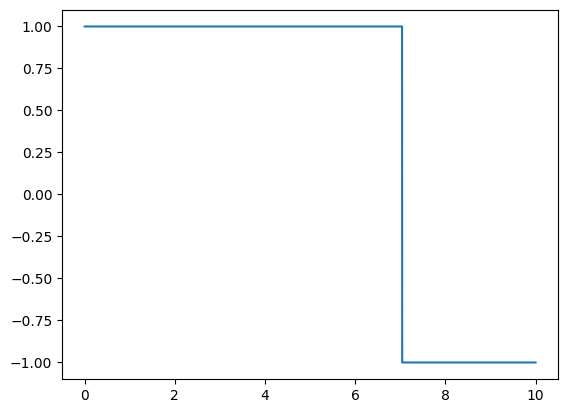

In [2]:
# feladat megoldása
# a) rész
# jelalakok
T = 10
t = np.linspace(0,T,10000)
def periodic_squares(t, A,w = 1):
    return A*signal.square(w*t,0.5)
def square(t,A):
    T = np.max(t)
    return A*signal.square((t-0.1)*(np.pi*2)/T,0.7)    
def sawtooth(t,A):
    T = np.max(t)
    return A*signal.sawtooth((t-0.0001)*(np.pi*2)/T,0)    
def triangle(t,A):
    T = np.max(t)
    return A*signal.sawtooth((t-0.0001)*(np.pi*2)/T,0.5)
plt.plot(t,square(t+0.2,1))    

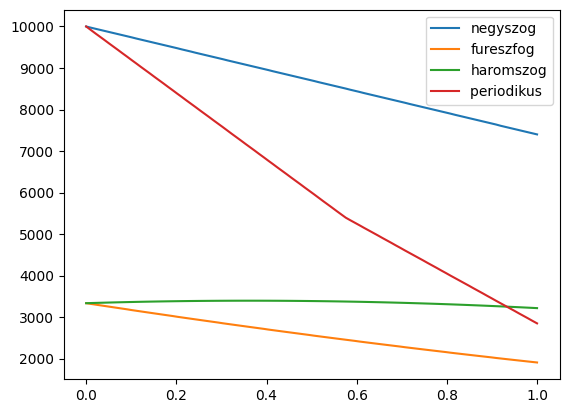

In [3]:
# b) rész
# autokorrelációk

n = np.linspace(0,1,100)


def self_correlate(f, t,n,A):
    
    corr = []
    for tao in  n:  
        corr.append(np.correlate(f(t,A),f(t-tao,A)))
    return corr                



corr1 = self_correlate(square,t,n,1) 
corr2 = self_correlate(sawtooth,t,n,1)
corr3 =  self_correlate(triangle,t,n,1)
corr4 = self_correlate(periodic_squares,t,n,1)
plt.plot(n,corr1,label="negyszog")
plt.plot(n,corr2, label="fureszfog")
plt.plot(n,corr3, label="haromszog")
plt.plot(n,corr4,label= "periodikus ")
plt.legend()

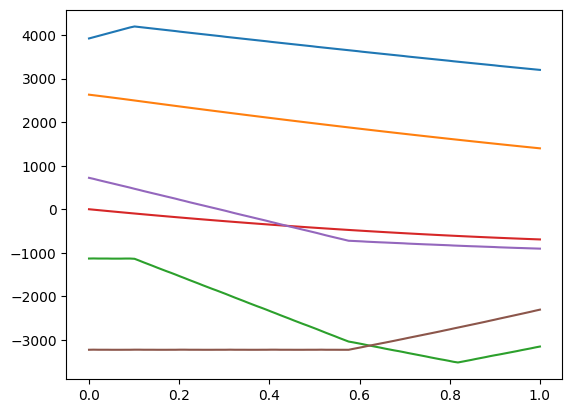

In [4]:
# c) rész
# keresztkorrelációk
def x_correlate(f,g, t,n,A):
    
    corr = []
    for tao in  n:  
        corr.append(np.correlate(f(t,A),g(t-tao,A)))
    return corr                

xcorr1 = x_correlate(square,sawtooth,t,n,1) 
xcorr2 = x_correlate(square,triangle,t,n,1)
xcorr3 = x_correlate(square,periodic_squares,t,n,1)

xcorr4 = x_correlate(sawtooth,triangle,t,n,1)
xcorr5 = x_correlate(sawtooth,periodic_squares,t,n,1)

xcorr6 = x_correlate(triangle,periodic_squares,t,n,1)

plt.plot(n,xcorr1)
plt.plot(n,xcorr2)
plt.plot(n,xcorr3)
plt.plot(n,xcorr4)
plt.plot(n,xcorr5)
plt.plot(n,xcorr6)


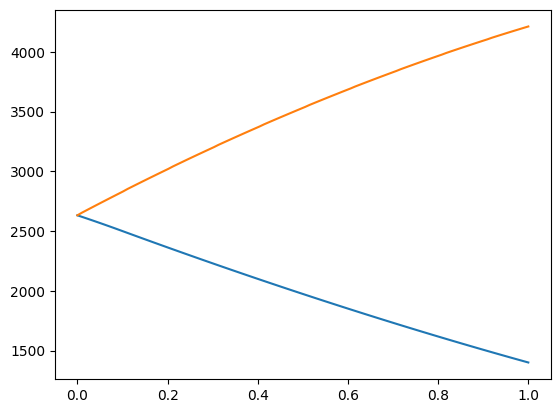

In [5]:
xcorr2b = x_correlate(triangle,square,t,n,1)

plt.plot(n,xcorr2)
plt.plot(n,xcorr2b)

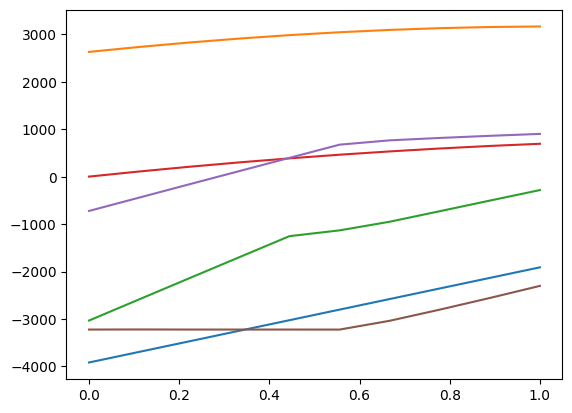

In [9]:
# d) rész
# konvolúciók
def x_convolve(f,g, t,n,A):
    
    corr = []
    for tao in  n:  
        corr.append(np.convolve(f(t,A),g(t-tao,A), 'valid'))
    return corr 
xconv1 = x_convolve(square,sawtooth,t,n,1) 
xconv2 = x_convolve(square,triangle,t,n,1)
xconv3 = x_convolve(square,periodic_squares,t,n,1)

xconv4 = x_convolve(sawtooth,triangle,t,n,1)
xconv5 = x_convolve(sawtooth,periodic_squares,t,n,1)

xconv6 = x_convolve(triangle,periodic_squares,t,n,1)

plt.plot(n,xconv1)
plt.plot(n,xconv2)
plt.plot(n,xconv3)
plt.plot(n,xconv4)
plt.plot(n,xconv5)
plt.plot(n,xconv6)

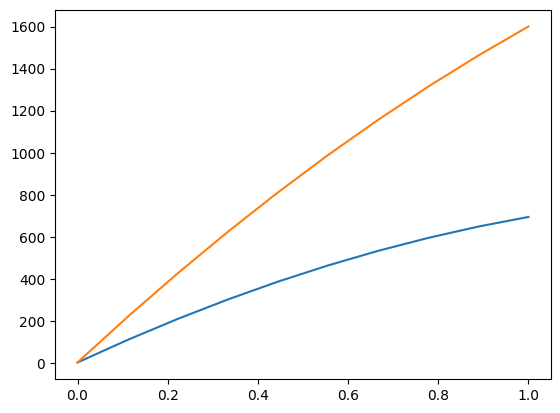

In [10]:
xconv4b = x_convolve(triangle,sawtooth,t,n,1)

plt.plot(n,xconv4)
plt.plot(n,xconv4b)

## Alap 2. feladatrész - Hold-radar kísérlet

Ebben és a következő feladatrészekben véletlenszerű folyamatokat fogunk vizsgálni és azt, hogy hogyan lehet ezek elemzésére felhasználni az előző feladatrészben tanultakat. 

Egy érdekes kísérlet, amiben véletlen folyamatnak, és a véletlen jelek statisztikus tulajdonságainak szerepe van, a Hold-radar kísérlet, melynek során a Holdról visszavert radarjeleket tudtak kimutatni.
(Ez néhány hét időkülönbséggel sikerült amerikai és magyar kutatóknak:
https://hu.wikipedia.org/wiki/Magyar_Hold-radar-kísérlet, https://en.wikipedia.org/wiki/Project_Diana)
A nehézség az volt, hogy a visszavert jel gyengesége miatt egyszerű módon nem tudták a vevők által fogott zajos jelből a visszevert jelet kiszűrni. A jelküldés sokszori ismétlésével és a felfogott jelek összegzésével azonban a jel felerősödött a zajhoz képest.

#### Feladat: 
Utánozzuk a Hold-radar kísérletet!
 Küldött jelként valamelyik impulzus jelünket válasszuk, azt egy $t_0$ időpontra eltolva!
Zajként vegyük a legegyszerűbb véletlen jelet, azaz egymás utáni időpillanatokban vett véletlen értékek sorozatát. Az értékek eloszlására a legtermészetesebb eloszlást, normál eloszlást válasszunk!
Felfogott jelként vegyük ezt a zajt, hozzáadva a kimenőjelet további késleltetéssel, és olyan kis amplitúdóval, hogy ábrázolásban ne legyen szemmel látható.

a) Mutassuk meg ábrán, hogy a felfogott jelen még nem látszik az impulzus. Másik ábrán mutassuk ki, hogy a "mérés" sokszori ismétlése és összegzése eredményeképpen az impulzus újra láthatóvá válik!

b) Próbáljuk ki azt is, hogy ha kiszámoljuk a kimenő jel és a felfogott jel korrelációs függvényét, az segít-e a jel jelenlétének kimutatásában! Tehát számoljuk ki és ábrázoljuk az összegzett felfogott jelnek a kimenő jellel vett korrelációs függvényét! Próbáljuk ki, mennyire lehet csökkenteni az ismétlések számát, esetleg el is lehet-e hagyni az ismétlést?

In [ ]:
# a) Utánozzuk a Hold-radar kísérletet!

In [ ]:
# b) korrelációs függvény használata

## Teljes 3. feladatrész - Véletlen bolyongás

Bonyolultabb véletlen folyamatok egyik fajtája a véletlen bolyongás, melyben egy "részecske" valamilyen valószínűségi eloszlás szerint meghatározott lépések megtételével mozog egy, kettő vagy több dimenzióban.
A diszkrét időlépésekben történő bolyongást gyakran a [Brown-mozgás](https://en.wikipedia.org/wiki/Brownian_motion) egyszerű leírására használjuk.
Az egyszerű bolyongás esetén az időfejlődést leíró egyenlet
$$ x(t_{k+1}) = x(t_k) + \xi_k\;,\;\; \mbox{azaz}\;\;\;\; x(t_k) = \sum_{j=0}^{k-1} \xi_j\;, $$
ahol $\xi_k$ a véletlen változó.

Az időben folytonos véletlen folyamatokat ún. sztochasztikus differenciálegyenletekkel írjuk le.
Például a véletlen bolyongás határesete a Wiener-folyamat, melynek egyenlete
$$
\dot x = \xi(t)\;,
$$
ahol $\xi(t)$ a véletlenszerű fehér zajt reprezentálja.

#### Feladatok

a)
Írjunk egy `randomwalk` függvényt, amely megadott $N$-re szimulál egy $N$ lépéses egydimenziós véletlen bolyongást normál eloszlású véletlen lépésekkel! Ábrázoljuk a folyamat egy szakaszát úgy, hogy a bolyongás tipikus viselkedése jól megfigyelhető legyen.

b)
Mutassuk meg, hogy a bolyongás során a kiindulási ponttól való eltávolodásnak a várható értéke arányos a lépésszám négyzetgyökével!

In [ ]:
# a) randomwalk függvény, véletlen bolyongás

In [ ]:
# b) sqrt(t) függés ellenőrzése

## Teljes 4. feladatrész - Stacionárius véletlen folyamatok


A véletlen folyamatok közül fontosak a stacionáriusak, amelyeknél a felvett $x$ értékek hosszú időre meghatározott eloszlásfüggvénye invariáns az időeltolásra. Ez a tulajdonság az egyszerű bolyongásra és a Wiener-folyamatra nem teljesül, mivel a koordináta értékek eloszlása egyre szélesedik.
A Brown mozgást végző részecske sebességének valószínűségeloszlása azonban stacionárius, ha a sebesség minden határon túli növekedésének a közeg viszkozitása gátat szab.
Ezt folytonos időre írja le az ún. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process), aminek differenciálegyenlete
$$ \dot v = - \gamma v + D\cdot\xi(t)\;,$$
ahol $\gamma$ és $D$ pozitív konstansok, melyek a csillapítás erősségét, illetve a folyamat diffúzivitását adják meg, $\xi(t)$ továbbra is fehér zaj.
Talán könyebben megérthető ennek időben diszkretizált változata:
$$ v(t_{k+1}) = (1-\alpha)\cdot v(t_k) + D\cdot\xi_k\;,\;\;\alpha=\gamma \Delta t\;,$$
amiben az első tag szemléletesen a sebesség csillapodását írja le  $\alpha\ll 1$ esetére. A második pedig az időlépés alatt a közeg részecskéivel történt ütközések eredő hatását adja meg (valójában az utóbbi függ a részecske sebességétől, de ez a hatás átlagolva az első tagba van beleértve). Vegyük észre, hogy a fenti képlet alapján sebesség időfejlődése két paramétertől függ: az $\alpha$-tól és $D$-től.
Érdemes megjegyezni, hogy a sebesség időfejlődése hasonlít a véletlen bolyongáshoz, és azzá is válik a $\gamma=0$ határesetben.

#### Feladatok

a) Írjunk egy  `brownian` függvényt, amely  az egydimenziós csillapított Brown-mozgás sebességét szimulálja és segítségével ábrázoljuk  azt az  idő függvényében!

b) Határozzuk meg a Brown-mozgás sebességének autokorrelációs függvényét $\alpha=0.01$ és $D=1$ értékekre és ábrázoljuk! Mivel ez egy  véletlen folyamat,  az autokorreláció értékei erősen véletlenszerűek. Végezzük el a szimulációt és számolást elegendően sokszor, és ellenőrizzük, hogy ha az eredményeket összeátlagoljuk egymással, az átlag valóban simább, mint az átlagolás nélküli korrelációs függvény! 

c) Hogyan függ a korrelációk lecsengése a mozgás paramétereitől? Vizsgáljuk meg egy, a fentebb használt $\alpha$ értéknél kisebb,  és egy nála nagyobb $\alpha$-ra ezt a kérdést! Ezután egy adott $\alpha$ érték mellett vegyünk még két  különböző $D$ értéket!  Foglaljuk össze röviden szavakban, hogy mit tapasztalunk!

d) Határozzuk meg  a Brown-mozgás sebességének teljesítményspektrumát! A b) részhez hasonlóan itt is mutassuk ki, 
hogy a többszöri lefuttatás során kapott teljesítményspektrumok átlaga simább, mint egy lefutásé!

e) Mutassuk meg  a csillapított Brown-mozgás esetére, hogy igaz a Wiener-Hincsin-tétel, azaz, hogy az autokorrelációs függvény Fourier-transzformáltjának abszolút értéke megegyezik a teljesítményspektrummal! Itt is próbáljuk ki az átlagolást!

In [ ]:
# a)  Brown-mozgás 

In [ ]:
# b) a Brown-mozgás sebességének autokorrelációs függvénye és átlaga

In [ ]:
# c) paraméterektől való függés

In [ ]:
# d) teljesítményspektrum és átlag 

In [ ]:
# e) a Wiener-Hincsin-tétel ellenőrzése

## <font color='green5'>5. Szorgalmi feladatrész: Kaotikus rendszer vizsgálata</font>

A kaotikus rendszerek  a véletlen folyamatok egy másik példáját mutatjál. Ebben az esetben a rendszert leíró  egyenlet teljesen determinisztikus, hosszú távon mégis véletlenszerű viselkedést tapasztalhatunk.

A logisztikus leképezés az egyik legegyszerűbb kaotikus viselkedést mutató rendszer, melyet a következő iteratív formula definiál (az érdeklődőbbek olvashatnak [róla itt](https://en.wikipedia.org/wiki/Logistic_map)):

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ érték egy ún. kontrollparaméter, amelytől függ, hogy a rendszer milyen viselkedést mutat, pl. hosszú távon periodikussá válik, vagy kaotikus viselkedést mutat. A kaotikus viselkedés $r_c \approx 3.56995$ és a maximális $r_{max}=4$ érték között figyelhető meg. Ezt a kaotikus viselkedést megszakítják olyan intervallumok, u.n. periódikus ablakok, ahol periódikus viselkedés figyelhető meg, amint a kinagyított [bifurkációs diagramon](https://en.wikipedia.org/wiki/Logistic_map#/media/File:Subsection_Bifurcation_Diagram_Logistic_Map.png)
jól látszik. A bifurkációs diagram a paraméter függvényében mutatja, hogy az egyes paraméterértékeknél a rendszer hosszútávú viselkedése során milyen $x$ értékeket jár be.
E rendszer az $r_{max}$ értéknél a legerősebben kaotikus.

A kaotikus rendszerek egy részének érdekes jellemzője, hogy bizonyos kontrollparaméter mellett ún. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselkedést mutatnak. Ilyenkor a rendszer váratlanul hosszabb vagy rövidebb ideig közel periodikus viselkedést mutat, majd idővel újra beáll a káosz, és ez a kettő váltakozik.
Ilyen a logisztikus leképezésben a periódikus ablakoktól kevéssel balra figyelhető meg, pl. $r=3.828$ értéknél, de $r$ értékét tovább csökkentve $r=3.8$-nál már ez a jelenség lényegében eltűnt.

Feladatok:

a) Írjunk függvényt, mely megvalósítja a fent definiált logisztikus leképezést.
Ábrázoljuk a folyamatot az $r$ kontrollparaméter néhány különböző értéke mellett.
Válasszuk ehhez a fent említett erősen kaotikus és intermittens esetet, és keressünk egy-egy hozzájuk hasonlót!

b) Bővítsük az előbbi vizsgálatokat az autokovariancia függvény meghatározásával, és ábrázoljuk, hogyan cseng le a korreláció ezekben az esetekben!

In [ ]:
# a)
# A logisztikus leképezést megvalósító függvény

In [ ]:
# a,b)
# A logisztikus leképezés tulajdonságainak vizsgálata